In [66]:
import numpy as np
import matplotlib.pyplot as plt

In [67]:
height, width = 3, 2
img = np.arange(6).reshape(3, 2)
print(img)

[[0 1]
 [2 3]
 [4 5]]


In [68]:
transform = np.array([[1, 0],
                      [0, -1]])
print(transform)

[[ 1  0]
 [ 0 -1]]


In [69]:
# Flip image horizontally
A = np.array([[1, 0],
              [0, -1]])

v1 = np.array([1, 0])
print(A.dot(v1))

v2 = np.array([1, 1])
print(A.dot(v2))

v3 = np.array([1, 2])
print(A.dot(v3))

[1 0]
[ 1 -1]
[ 1 -2]


In [70]:
A = np.array([[1, 0],
              [0, -1]])

H = 3 # Height of image
p = np.array([0, H-1])
print("p", p)

v1 = np.array([1, 0])
print(A.dot(v1) + p)

v2 = np.array([1, 1])
print(A.dot(v2) + p)

v3 = np.array([1, 2])
print(A.dot(v3) + p)

p [0 2]
[1 2]
[1 1]
[1 0]


In [71]:
for x2 in range(height):
    for x1 in range(width):      
        v = np.array([x1, x2])
        new_x1, new_x2 = A.dot(v) + p
        print(f'({x1, x2}) -> ({new_x1}, {new_x2})')
    print()

((0, 0)) -> (0, 2)
((1, 0)) -> (1, 2)

((0, 1)) -> (0, 1)
((1, 1)) -> (1, 1)

((0, 2)) -> (0, 0)
((1, 2)) -> (1, 0)



In [72]:
output = np.zeros((height, width))
print(output)

[[0. 0.]
 [0. 0.]
 [0. 0.]]


In [73]:
# implement naively for the sake of simplicity
height = 3
width = 2
img = np.arange(6).reshape(3, 2)

A = np.array([[1, 0],
              [0, -1]])
p = np.array([0, height - 1]) # translation vector

for x2 in range(height):
    for x1 in range(width):      
        v = np.array([x1, x2])
        color = img[x2, x1] # get the color of the pixel
        print("color", color)

        new_x1, new_x2 = A.dot(v) + p
        print(f'({x1, x2}) -> ({new_x1}, {new_x2})')
        output[new_x2, new_x1] = color # set the color of the pixel, x is index -> we flip verticelly we need to swap in row value


# print output
print(img)
print(output)

color 0
((0, 0)) -> (0, 2)
color 1
((1, 0)) -> (1, 2)
color 2
((0, 1)) -> (0, 1)
color 3
((1, 1)) -> (1, 1)
color 4
((0, 2)) -> (0, 0)
color 5
((1, 2)) -> (1, 0)
[[0 1]
 [2 3]
 [4 5]]
[[4. 5.]
 [2. 3.]
 [0. 1.]]


FLIP WITH GRAYSCALE

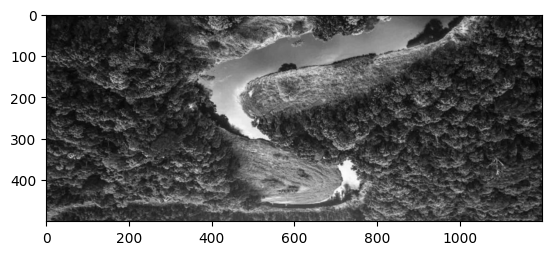

In [74]:
import cv2
import numpy as np

img = cv2.imread('nature_gray.png', 0)
height, width = img.shape

A = np.array([[1, 0],
              [0, -1]])
p = np.array([0, height-1])

output = np.zeros((height, width))
for x2 in range(height):
    for x1 in range(width):
        color = img[x2, x1]
        v = np.array([x1, x2])

        new_x1, new_x2 = A.dot(v) + p
        output[new_x2, new_x1] = color

plt.imshow(output, cmap='gray')
plt.show()

FLIP WITH COLOR

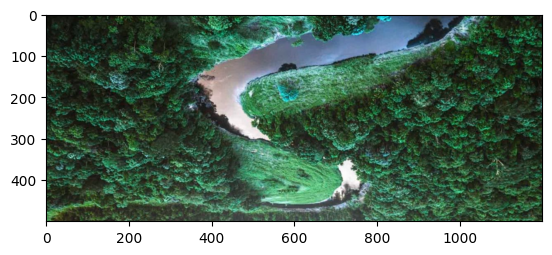

In [78]:

img = cv2.imread('nature.png', 1)
img = img.astype(float)
height, width, depth = img.shape

transform = np.array([[1, 0],
                      [0, -1]])

output = np.zeros((height, width, depth))
for i in range(height):
    for j in range(width):
        pixel = img[i, j, :]
        
        new_j, new_i = transform.dot(np.array([j, i])) + [0, height-1]
        output[new_i, new_j, :] = pixel
        
plt.imshow(output.astype(np.uint8))
plt.show()